# Import Libraries

In [516]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Data Collection and Processing

In [517]:
# Import Datasets
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [518]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [519]:
# Loading the data to a data frame
data_frame = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)

In [520]:
# print the first 5 rows of data_frame
data_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [521]:
# adding the 'target' column to the data_frame
data_frame['label'] = breast_cancer_dataset.target

In [522]:
data_frame.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [523]:
# number of rows and columns in the datasets
data_frame.shape

(569, 31)

In [524]:
# Getting some information about the data
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [525]:
# Checking for missing values
data_frame.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [526]:
# Statistical measure about the data
data_frame.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [527]:
# Checking the distribution of target variable
data_frame['label'].value_counts()

# 1 --> Benign (Jinak)
# 0 --> Malignant (Ganas)

label
1    357
0    212
Name: count, dtype: int64

In [528]:
data_frame.groupby('label').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
label,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


# Separating the features and target

In [529]:
X = data_frame.drop(columns='label', axis=1) # axis = 1 adalah column
Y = data_frame['label']

In [530]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [531]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: label, Length: 569, dtype: int32

In [532]:
# Splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
# test_size = 0.2 -> untuk memisahkan data, 80% training 20% testing

In [533]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


# Model Training (Logistic)

In [534]:
logisticModel = LogisticRegression(max_iter=10000)

In [535]:
logisticModel.fit(X_train, Y_train)

LogisticRegression(max_iter=10000)

# Model Evaluation (Logistic)

In [536]:
logistic_x_train = logisticModel.predict(X_train)
logistic_training_accuracy = accuracy_score(Y_train, logistic_x_train)

In [537]:
print('Accuracy on training data (Logistic) = ', round(logistic_training_accuracy * 100, 2), "%")

Accuracy on training data (Logistic) =  96.92 %


In [538]:
logistic_x_test = logisticModel.predict(X_test)
logistic_test_accuracy = accuracy_score(Y_test, logistic_x_test)

In [539]:
print('Accuracy on test data (Logistic) = ', round(logistic_test_accuracy * 100, 2), "%")

Accuracy on test data (Logistic) =  92.98 %


In [540]:
print("Classification Report (Logistic):")
print(classification_report(Y_test, logistic_x_test))

Classification Report (Logistic):
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        45
           1       0.94      0.94      0.94        69

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



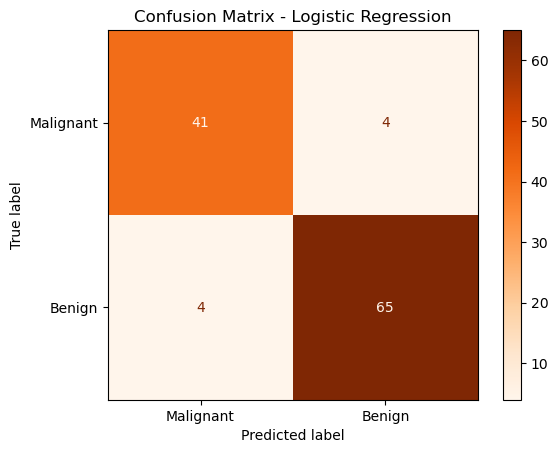

In [541]:
# Confusion Matrix untuk Logistic Regression
cm_log = confusion_matrix(Y_test, logistic_x_test)
disp_log = ConfusionMatrixDisplay(confusion_matrix=cm_log, display_labels=["Malignant", "Benign"])
disp_log.plot(cmap=plt.cm.Oranges)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

# Scaling data -> for SVM

In [542]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Training (SVM)

In [543]:
# SVM Model
svmModel = SVC(kernel='linear', probability=True)

In [544]:
# Training the logistic regression model using traingin data
svmModel.fit(X_train_scaled, Y_train)

SVC(kernel='linear', probability=True)

# Model Evaluation (SVM)

In [545]:
# Accuracy Score on training data
svm_x_training = svmModel.predict(X_train_scaled)
svm_training_accuracy = accuracy_score(Y_train, svm_x_training)

In [546]:
print('Accuracy on training data (SVM) = ', round(svm_training_accuracy * 100, 2), "%")

Accuracy on training data (SVM) =  98.24 %


In [547]:
# Accuracy Score on test data
svm_x_test = svmModel.predict(X_test_scaled)
svm_test_accuracy = accuracy_score(Y_test, svm_x_test)

In [548]:
print('Accuracy on test data (SVM) = ', round(svm_test_accuracy * 100, 2), "%")

Accuracy on test data (SVM) =  97.37 %


In [549]:
print("Classification Report (SVM):")
print(classification_report(Y_test, svm_x_test))

Classification Report (SVM):
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        45
           1       0.96      1.00      0.98        69

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



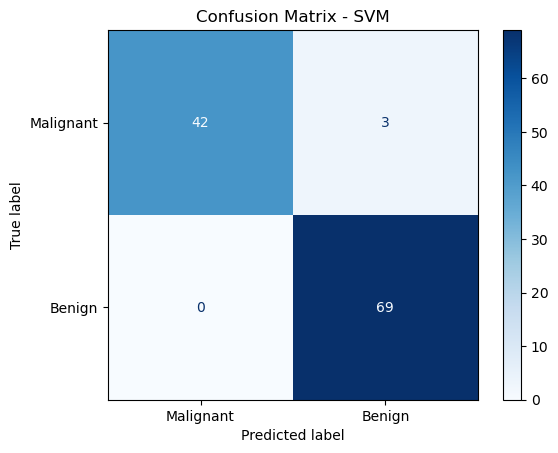

In [550]:
# Confusion Matrix untuk SVM
cm_svm = confusion_matrix(Y_test, svm_x_test)

disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=["Malignant", "Benign"])
disp_svm.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - SVM")
plt.show()

# Cross Validation

In [551]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline

svm_pipeline = make_pipeline(MinMaxScaler(), SVC(kernel='linear', probability=True))
svm_cv_scores = cross_val_score(svm_pipeline, X, Y, cv=5)
print("Akurasi tiap fold (SVM):", np.round(svm_cv_scores * 100, 2), "%")
print("Rata-rata akurasi SVM (5-Fold CV):", np.round(np.mean(svm_cv_scores) * 100, 2), "%")

# Logistic Regression Cross Validation
logreg_pipeline = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=10000))
logreg_cv_scores = cross_val_score(logreg_pipeline, X, Y, cv=5)
print("Akurasi tiap fold (Logistic Regression):", np.round(logreg_cv_scores * 100, 2), "%")
print("Rata-rata akurasi Logistic Regression (5-Fold CV):", round(np.mean(logreg_cv_scores) * 100, 2), "%")

Akurasi tiap fold (SVM): [95.61 98.25 97.37 96.49 98.23] %
Rata-rata akurasi SVM (5-Fold CV): 97.19 %
Akurasi tiap fold (Logistic Regression): [95.61 96.49 96.49 95.61 96.46] %
Rata-rata akurasi Logistic Regression (5-Fold CV): 96.13 %


# Hyperparameter Tuning

=== Hyperparameter Tuning SVM ===
Best Parameters: {'svc__C': 10, 'svc__gamma': 'scale', 'svc__kernel': 'rbf'}
Best Cross-Validation Accuracy: 97.54 %

Classification Report (Best Tuned SVM):
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        45
           1       0.99      0.97      0.98        69

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



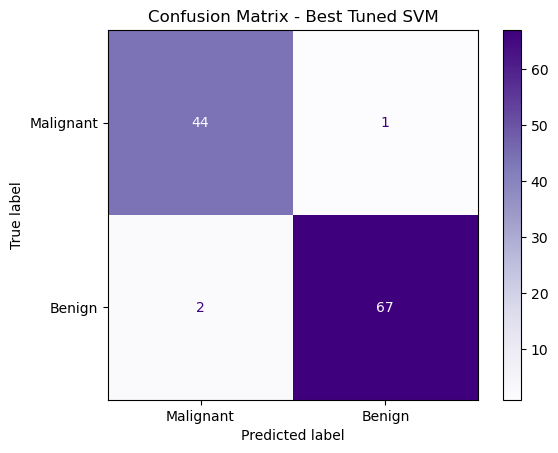

In [552]:
param_grid = {
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__kernel': ['linear', 'rbf'],
    'svc__gamma': ['scale', 'auto']
}

grid = GridSearchCV(svm_pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X, Y)

print("=== Hyperparameter Tuning SVM ===")
print("Best Parameters:", grid.best_params_)
print("Best Cross-Validation Accuracy:", round(grid.best_score_ * 100, 2), "%")

# Model terbaik
best_svm_model = grid.best_estimator_
best_svm_model.fit(X_train, Y_train)
best_svm_pred = best_svm_model.predict(X_test)

print("\nClassification Report (Best Tuned SVM):")
print(classification_report(Y_test, best_svm_pred))

ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(Y_test, best_svm_pred), display_labels=["Malignant", "Benign"]).plot(cmap=plt.cm.Purples)
plt.title("Confusion Matrix - Best Tuned SVM")
plt.show()


# Save Model

In [553]:
import joblib
joblib.dump(best_svm_model, "breast_cancer_model.pkl")

['breast_cancer_model.pkl']

# Building a Prediction System

In [554]:
# from sklearn.metrics import classification_report
# input_data = (15.34,14.26,102.5,704.4,0.1073,0.2135,0.2077,0.09756,0.2521,0.07032,0.4388,0.7096,3.384,44.91,0.006789,0.05328,0.06446,0.02252,0.03672,0.004394,18.07,19.08,125.1,980.9,0.139,0.5954,0.6305,0.2393,0.4667,0.09946)
# # input_data = (9.504,12.44,60.34,273.9,0.1024,0.06492,0.02956,0.02076,0.1815,0.06905,0.2773,0.9768,1.909,15.7,0.009606,0.01432,0.01985,0.01421,0.02027,0.002968,10.23,15.66,65.13,314.9,0.1324,0.1148,0.08867,0.06227,0.245,0.07773)

# # Change the input data to a numpy array
# input_data_as_numpy_array = np.asarray(input_data)

# # Reshape the numpy array as we are predicting for one datapoint
# input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# # Scaled input
# input_scaled = scaler.transform(input_data_reshaped)

# prediction = model.predict(input_scaled)
# prob = model.predict_proba(input_scaled)
# print(prediction)
# # print(classification_report(input_data_reshaped, prediction))

# if(prediction[0] == 0):
#     print("The Breast Cancer is Malignant")
# else:
#     print("The Breast Cancer is Benign")

# print(f"Probability (Malignant vs Benign): {prob[0][0]:.2f} vs {prob[0][1]:.2f}")
